# Lead Score - Case Study

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 : Loading and Cleaning Data

##  1.1  Import Data 

In [2]:
# Loading the data using Pandas
df = pd.read_csv('Leads.csv')
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


## 1.2 Inspect the dataframe
This helps to give a good idea of the dataframes.

In [3]:
# The .info() code gives almost the entire information that needs to be inspected, so let's start from there
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
#To get the idea of how the table looks like we can use .head() or .tail() command
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# The .shape code gives the no. of rows and columns
df.shape

(9240, 37)

In [6]:
#To get an idea of the numeric values, use .describe()
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 1.3 Cleaning the dataframe

In [7]:
# Converting all the values to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [8]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df = df.replace('select',np.nan)

In [9]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [10]:
# Dropping unique valued columns
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [11]:
# Checking the percentage of missing values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
# Removing all the columns that are no required and have 35% null values
df2 = df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [13]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

<font color= green>___There is a huge value of null variables in 4 columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.___</font>

In [14]:
df2['Specialization'] = df2['Specialization'].fillna('not provided') 
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not provided')
df2['Country'] = df2['Country'].fillna('not provided')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not provided')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [15]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [16]:
df2["Country"].value_counts()

Country
india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switze

In [17]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df2['Country'] = df2.apply(lambda x:slots(x['Country']), axis = 1)
df2['Country'].value_counts()

Country
india            6492
not provided     2461
outside india     287
Name: count, dtype: int64

In [18]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [19]:
# Checking the percent of lose if the null values are removed
round(100*(sum(df2.isnull().sum(axis=1) > 1)/df2.shape[0]),2)

1.48

In [20]:
df3 = df2[df2.isnull().sum(axis=1) <1]

In [21]:
# Code for checking number of rows left in percent
round(100*(df3.shape[0])/(df.shape[0]),2)

98.2

In [22]:
# Rechecking the percentage of missing values
round(100*(df3.isnull().sum()/len(df3.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [23]:
# To familiarize all the categorical values
for column in df3:
    print(df3[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9074, dtype: int64
----------------------------------------------------------------------------------------
Lead Origin
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: count, dtype: int64
----------------------------------------------------------------------------------------
Lead Source
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443


In [24]:
# Removing Id values since they are unique for everyone
df_final = df3.drop('Prospect ID',axis=1)
df_final.shape

(9074, 21)

## 2. EDA

### 2.1. Univariate Analysis

#### 2.1.1. Categorical Variables

In [25]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

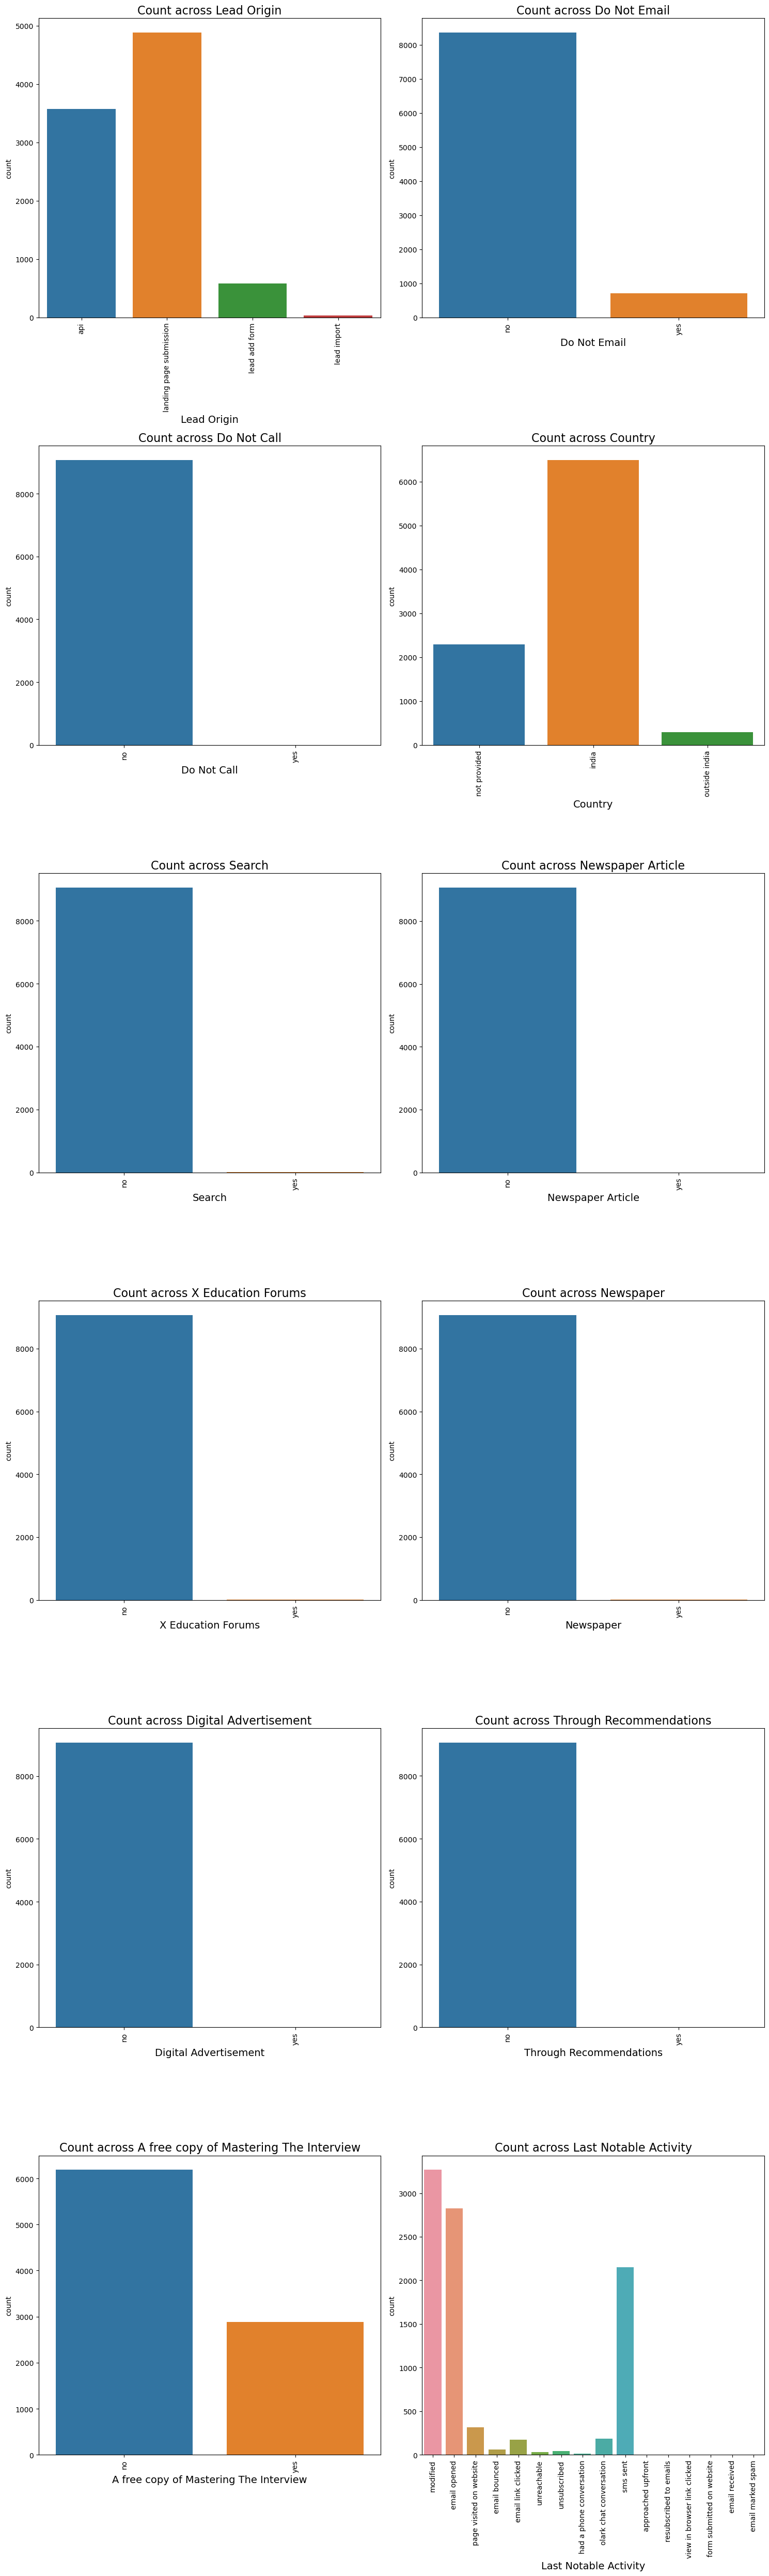

In [26]:
def countplot(title, fig):
    plt.subplot(6, 2, fig)  # Use subplot (2 rows, 2 columns, fig as the position)
    sns.countplot(x= title, data= df_final)
    plt.title('Count across ' + title, size=16)
    plt.xlabel(title, size=14)
    plt.xticks(rotation=90)

plt.figure(figsize=(15,50))

# Generating the countplots in respective subplots
countplot('Lead Origin', 1)
countplot('Do Not Email', 2)
countplot('Do Not Call', 3)
countplot('Country', 4)
countplot('Search', 5)
countplot('Newspaper Article', 6)
countplot('X Education Forums', 7)
countplot('Newspaper', 8)
countplot('Digital Advertisement', 9)
countplot('Through Recommendations', 10)
countplot('A free copy of Mastering The Interview', 11)
countplot('Last Notable Activity', 12)

# Adjust the layout to avoid overlapping
plt.tight_layout()

plt.show()


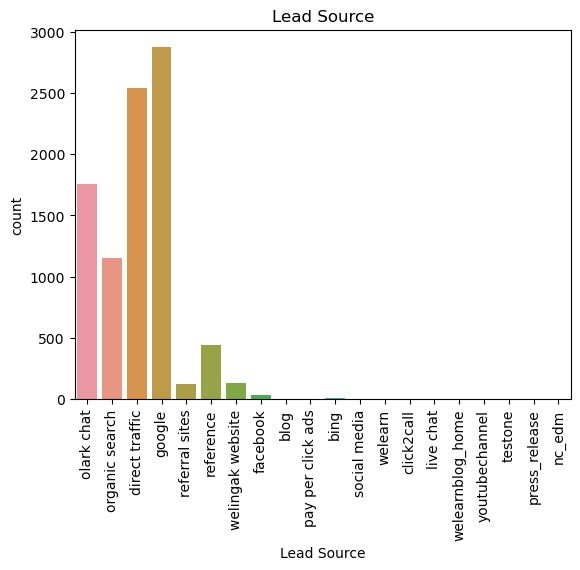

In [27]:
sns.countplot(x='Lead Source', data=df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

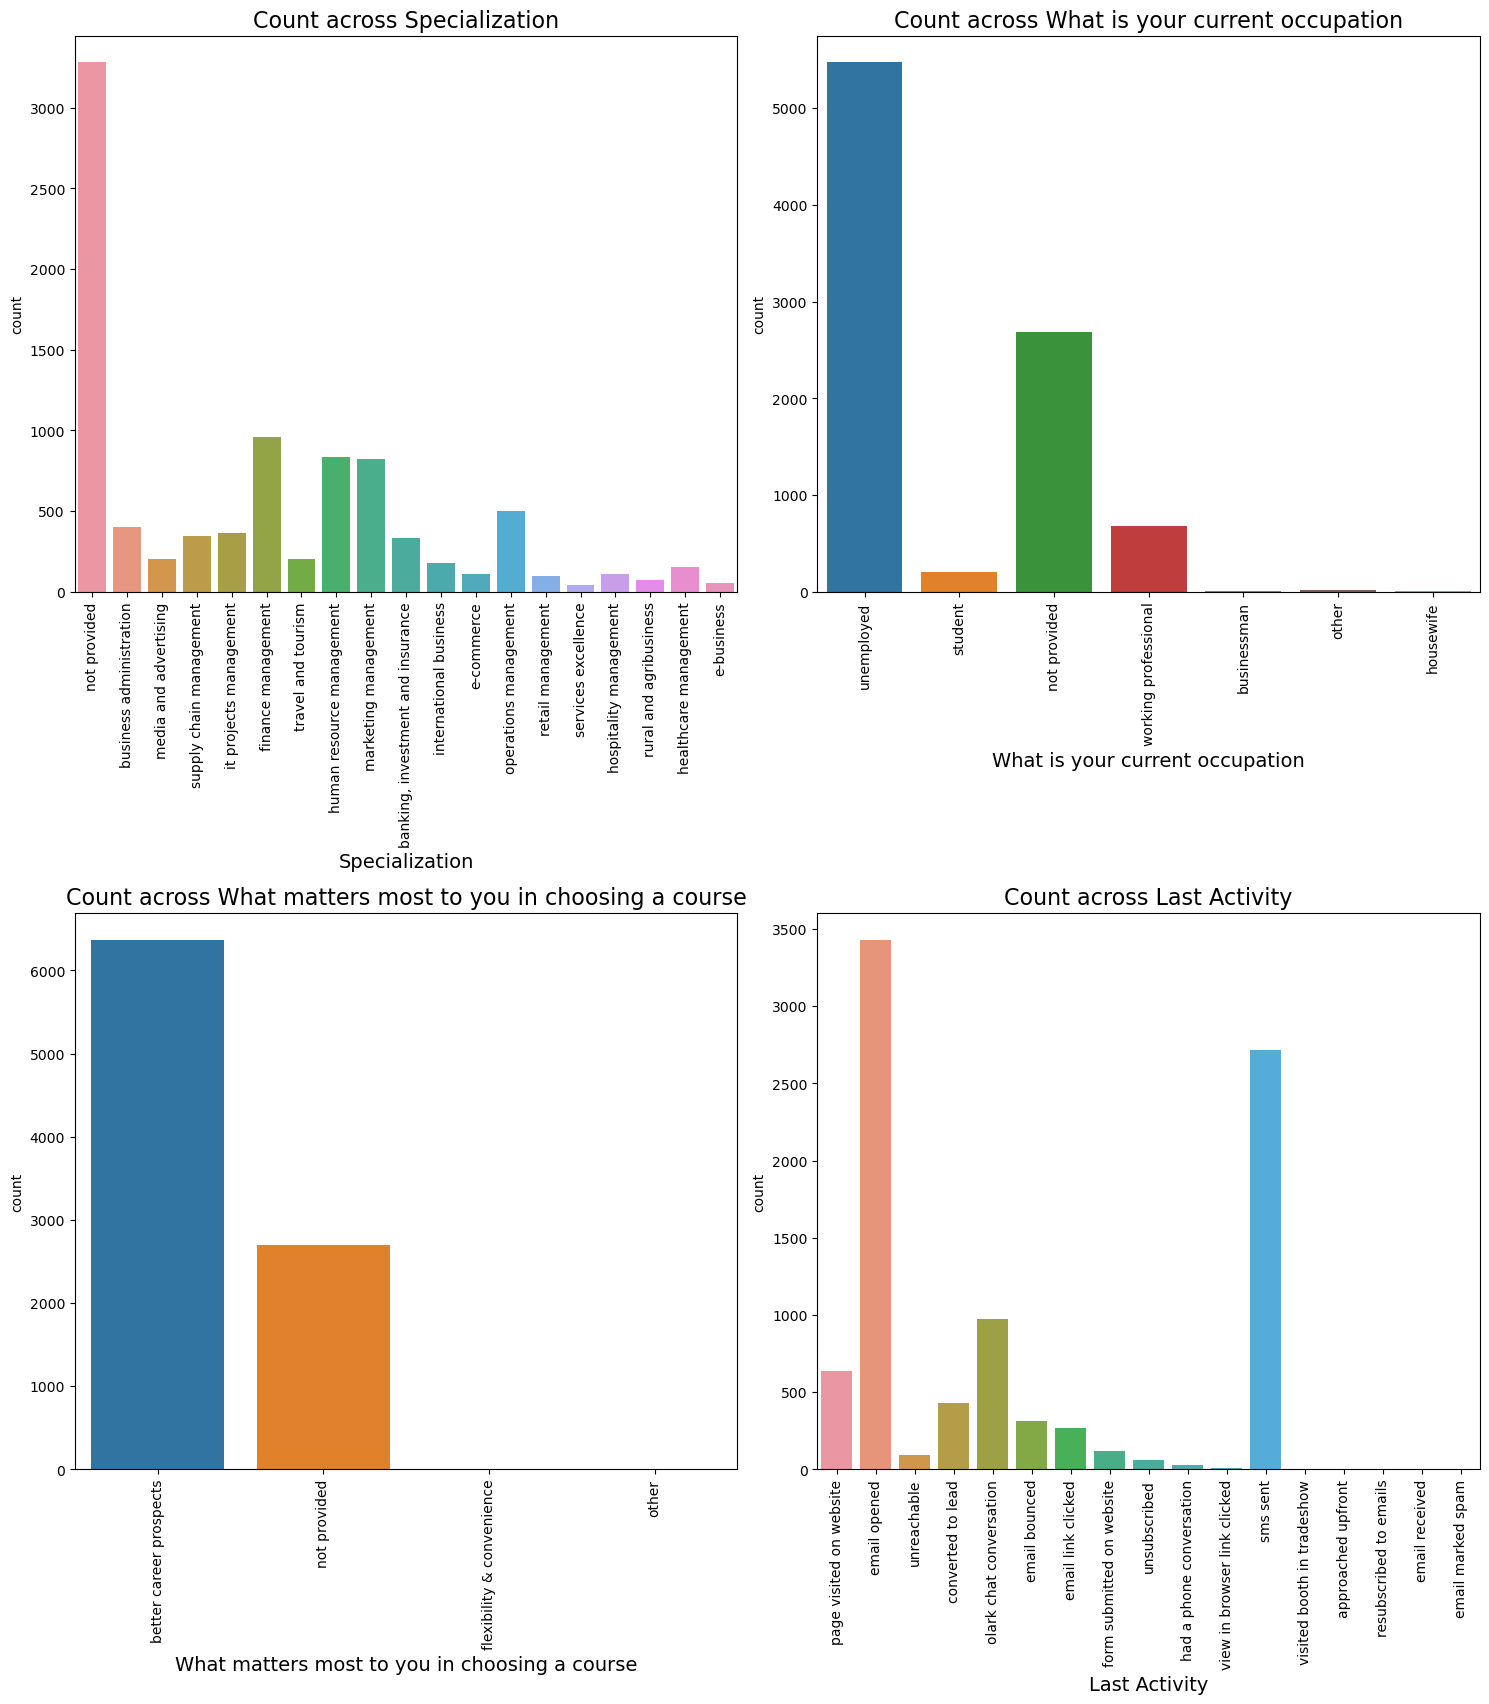

In [28]:
plt.figure(figsize = (15,50))
#plt.subplot(2,2,1)
#sns.countplot(df_final['Specialization']).tick_params(axis='x', rotation = 90)
#plt.title('Specialization')
#plt.subplot(2,2,2)
#sns.countplot(df_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
#plt.title('Current Occupation')
#plt.subplot(2,2,3)
#sns.countplot(df_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
#plt.title('What matters most to you in choosing a course')
#plt.subplot(2,2,4)
#sns.countplot(df_final['Last Activity']).tick_params(axis='x', rotation = 90)
#plt.title('Last Activity')
#plt.show()


countplot('Specialization', 1)
countplot('What is your current occupation', 2)
countplot('What matters most to you in choosing a course', 3)
countplot('Last Activity', 4)

# Adjust the layout to avoid overlapping
plt.tight_layout()

plt.show()


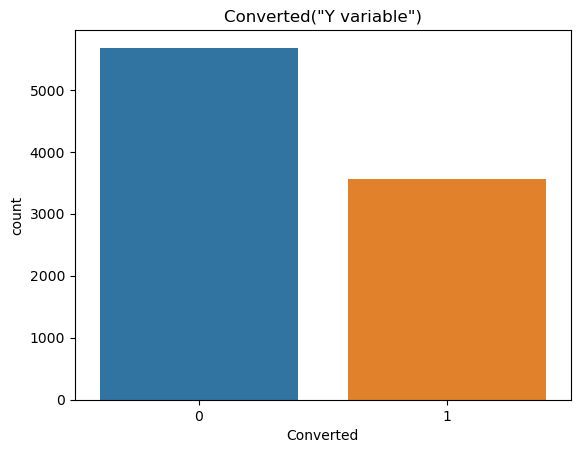

In [29]:
sns.countplot(x='Converted', data= df)
plt.title('Converted("Y variable")')
plt.show()

#### 2.1.1. Numerical Variables

In [30]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

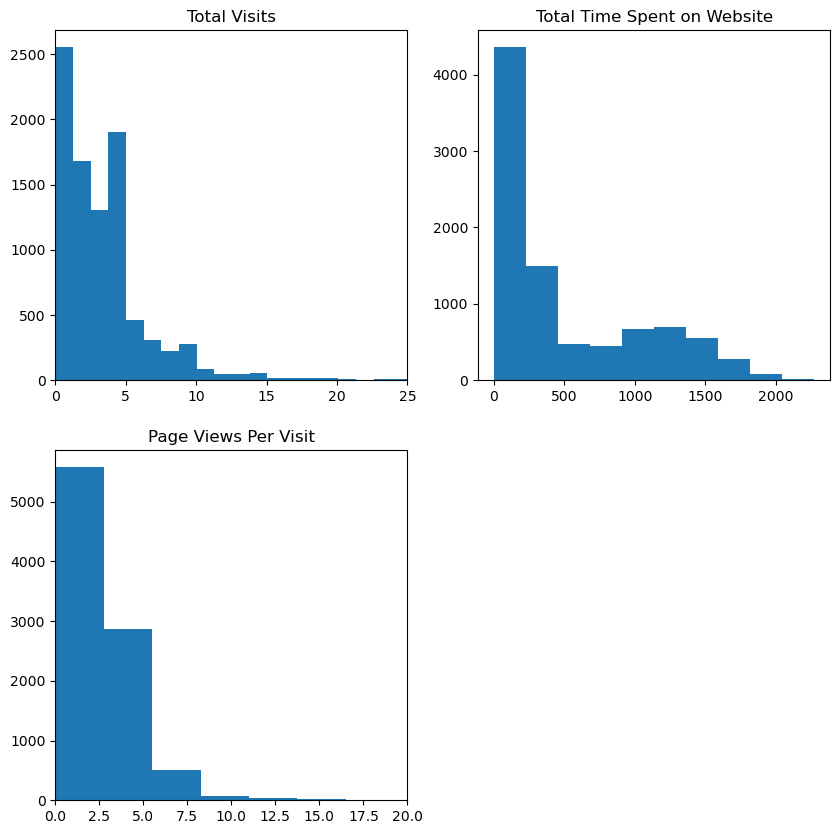

In [31]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### 2.1. Relating all the categorical variables to Converted

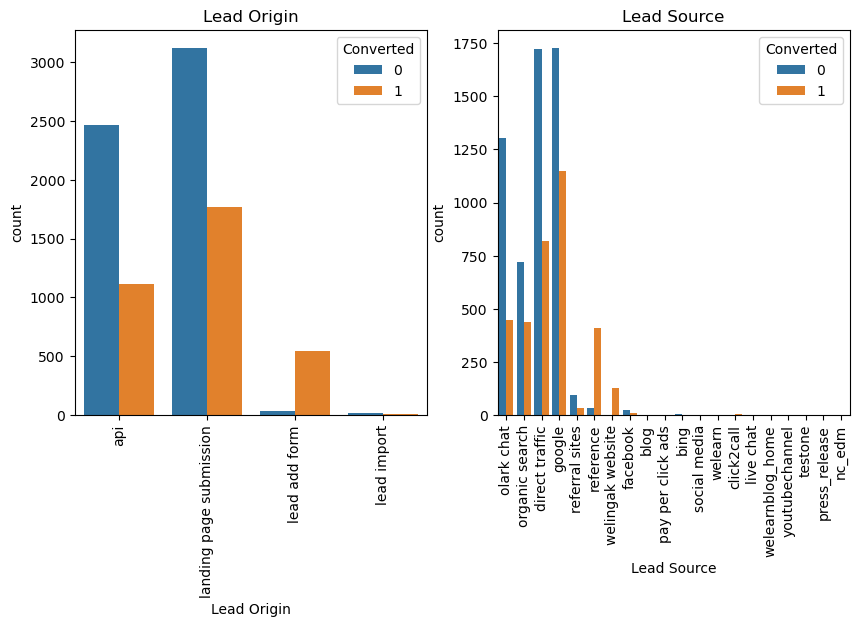

In [32]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

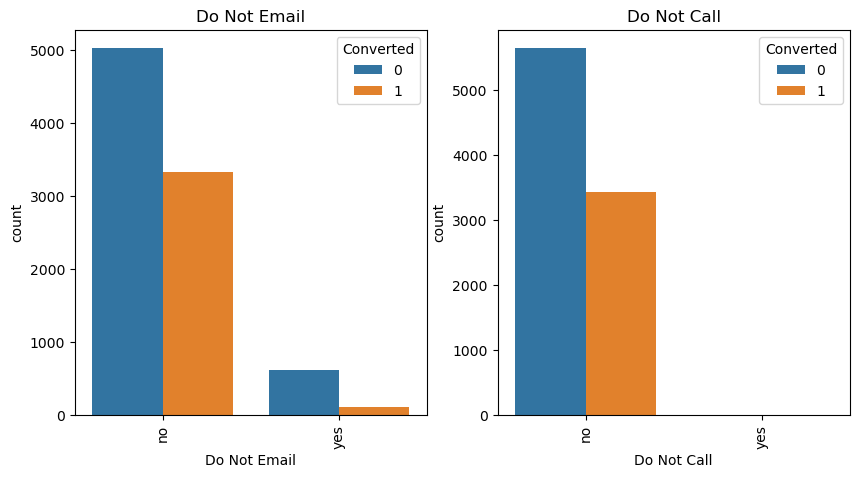

In [33]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

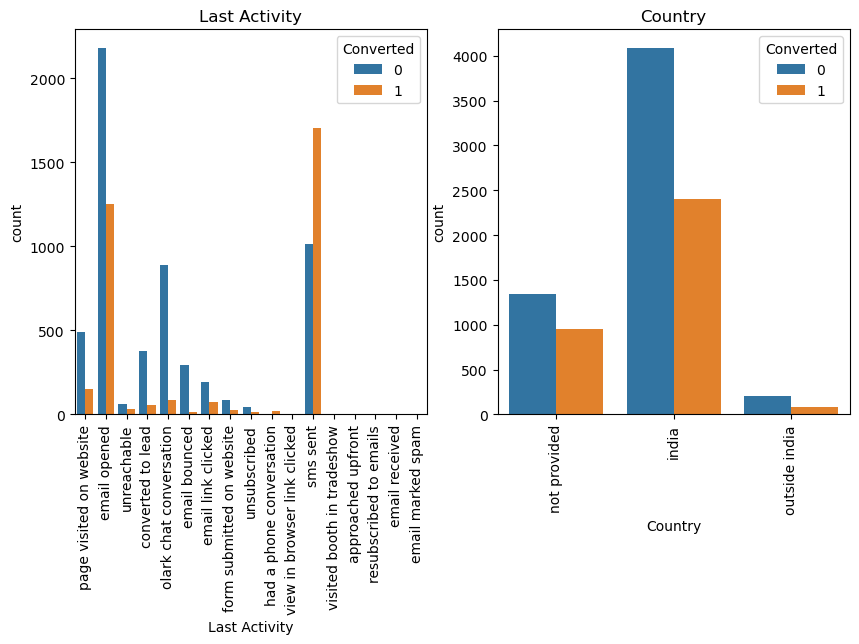

In [34]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

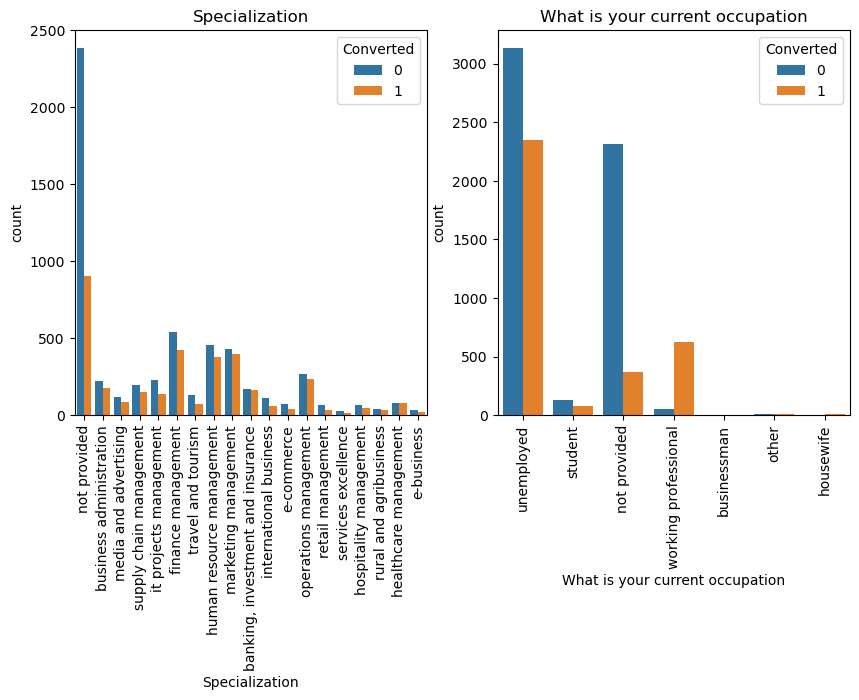

In [35]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

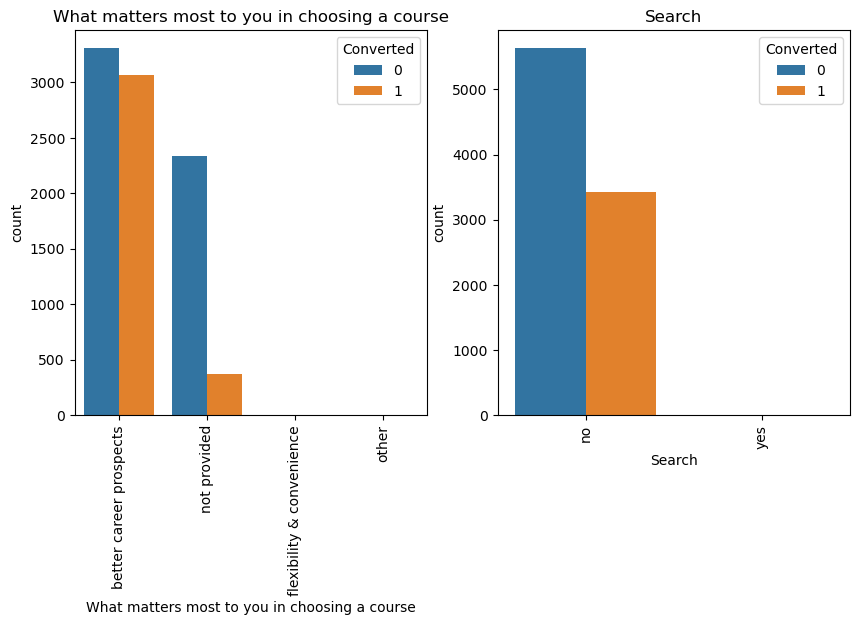

In [36]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

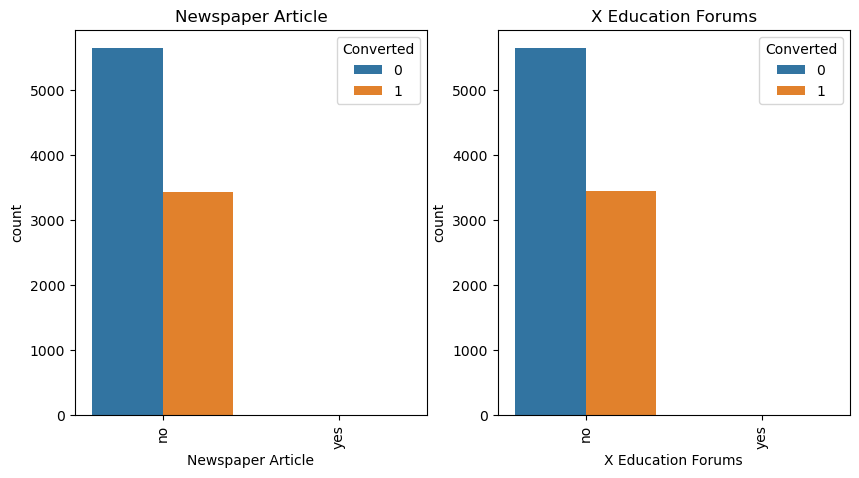

In [37]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

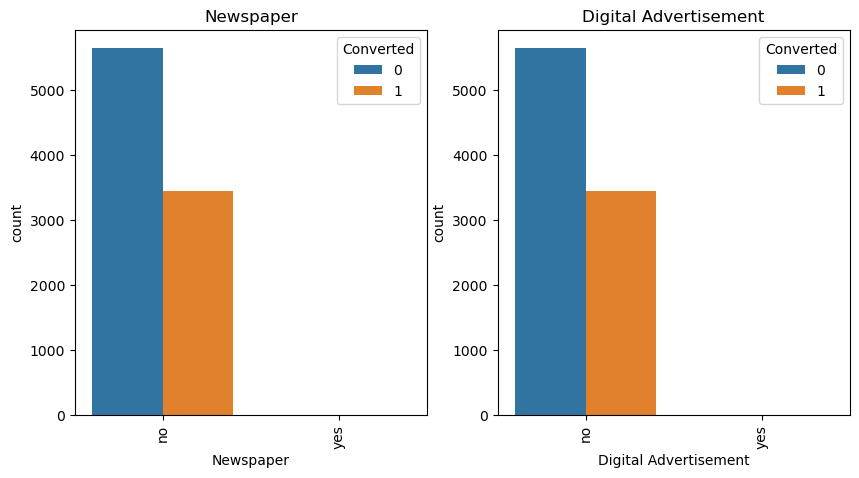

In [38]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

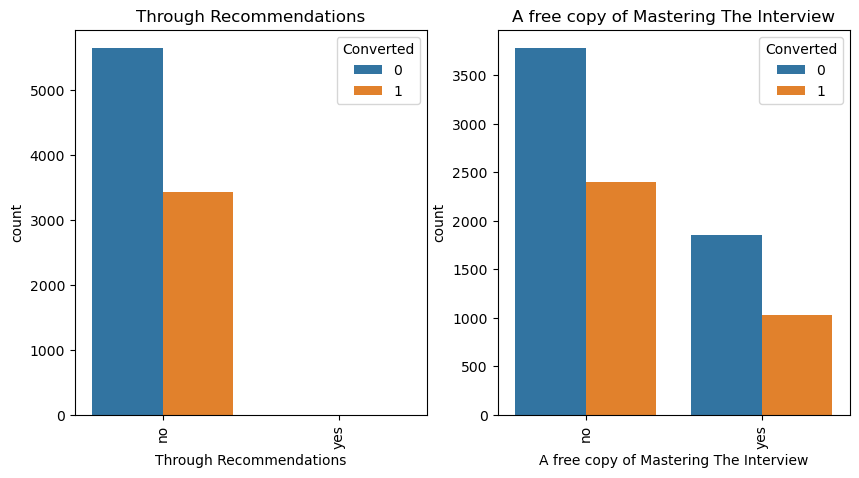

In [39]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

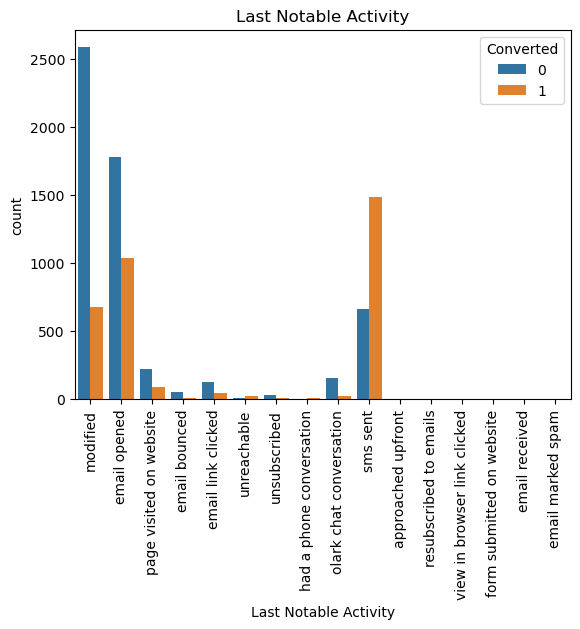

In [40]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

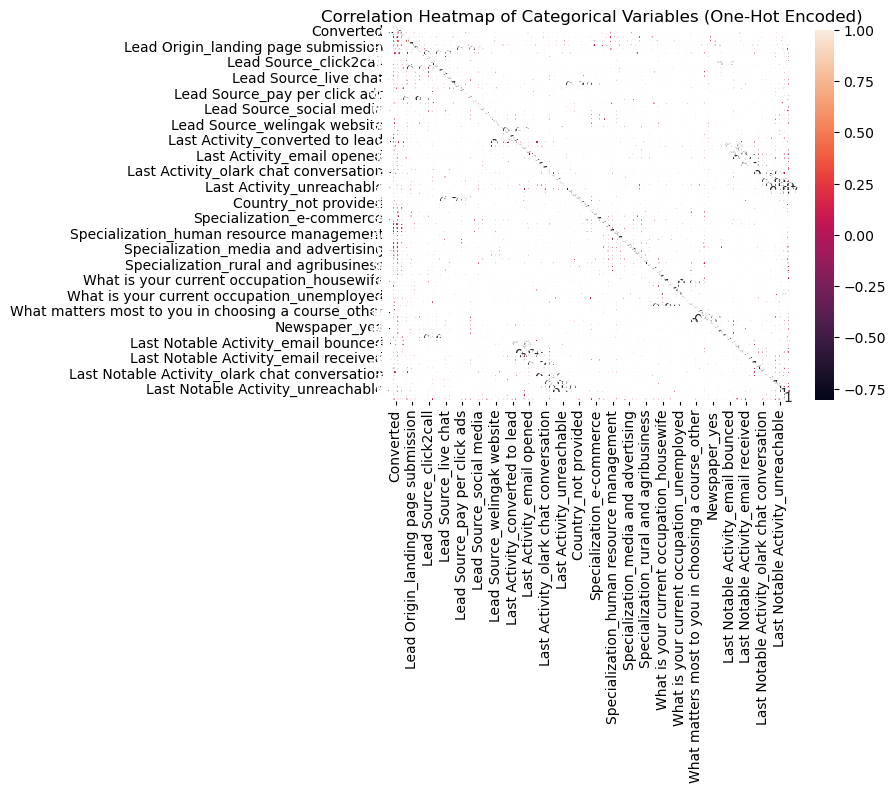

In [41]:
# To check the correlation among varibles
#plt.figure(figsize=(10,5))
#sns.heatmap(df_final.corr())
#plt.show()


df_encoded = pd.get_dummies(df_final, drop_first=True)
#plt.figure(figsize=(10, 5))
sns.heatmap(df_encoded.corr(), annot=True)
plt.title('Correlation Heatmap of Categorical Variables (One-Hot Encoded)')
plt.show()

<font color= green>___It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.___</font>

In [42]:
numeric = df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


<font color= green>___There aren't any major outliers, so moving on to analysis___</font>

## 3. Dummy Variables

In [43]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

In [44]:
df_final.loc[:, df_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [45]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final_dum = pd.concat([df_final, dummy], axis=1)
df_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,False,False,True,False,False,False,False,False,False,False
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,False,False,False,False,False,False,False,False,False,False
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,False,False,False,False,False,False,False,False,False,False
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,False,False,True,False,False,False,False,False,False,False
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,False,False,False,False,False,False,False,False,False,False
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False


In [46]:
df_final_dum = df_final_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)
df_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.50,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.00,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1,2.0,1428,1.00,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9236,0,2.0,238,2.00,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9237,0,2.0,199,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
9238,1,3.0,499,3.00,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


## 4. Test-Train Split

In [47]:
# Import the required library
from sklearn.model_selection import train_test_split

In [48]:
X = df_final_dum.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2.0,1428,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [49]:
# Putting the target variable in y
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [50]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [51]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3604,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5584,0.042553,0.751761,0.250000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7679,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7563,0.014184,0.787852,0.083333,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


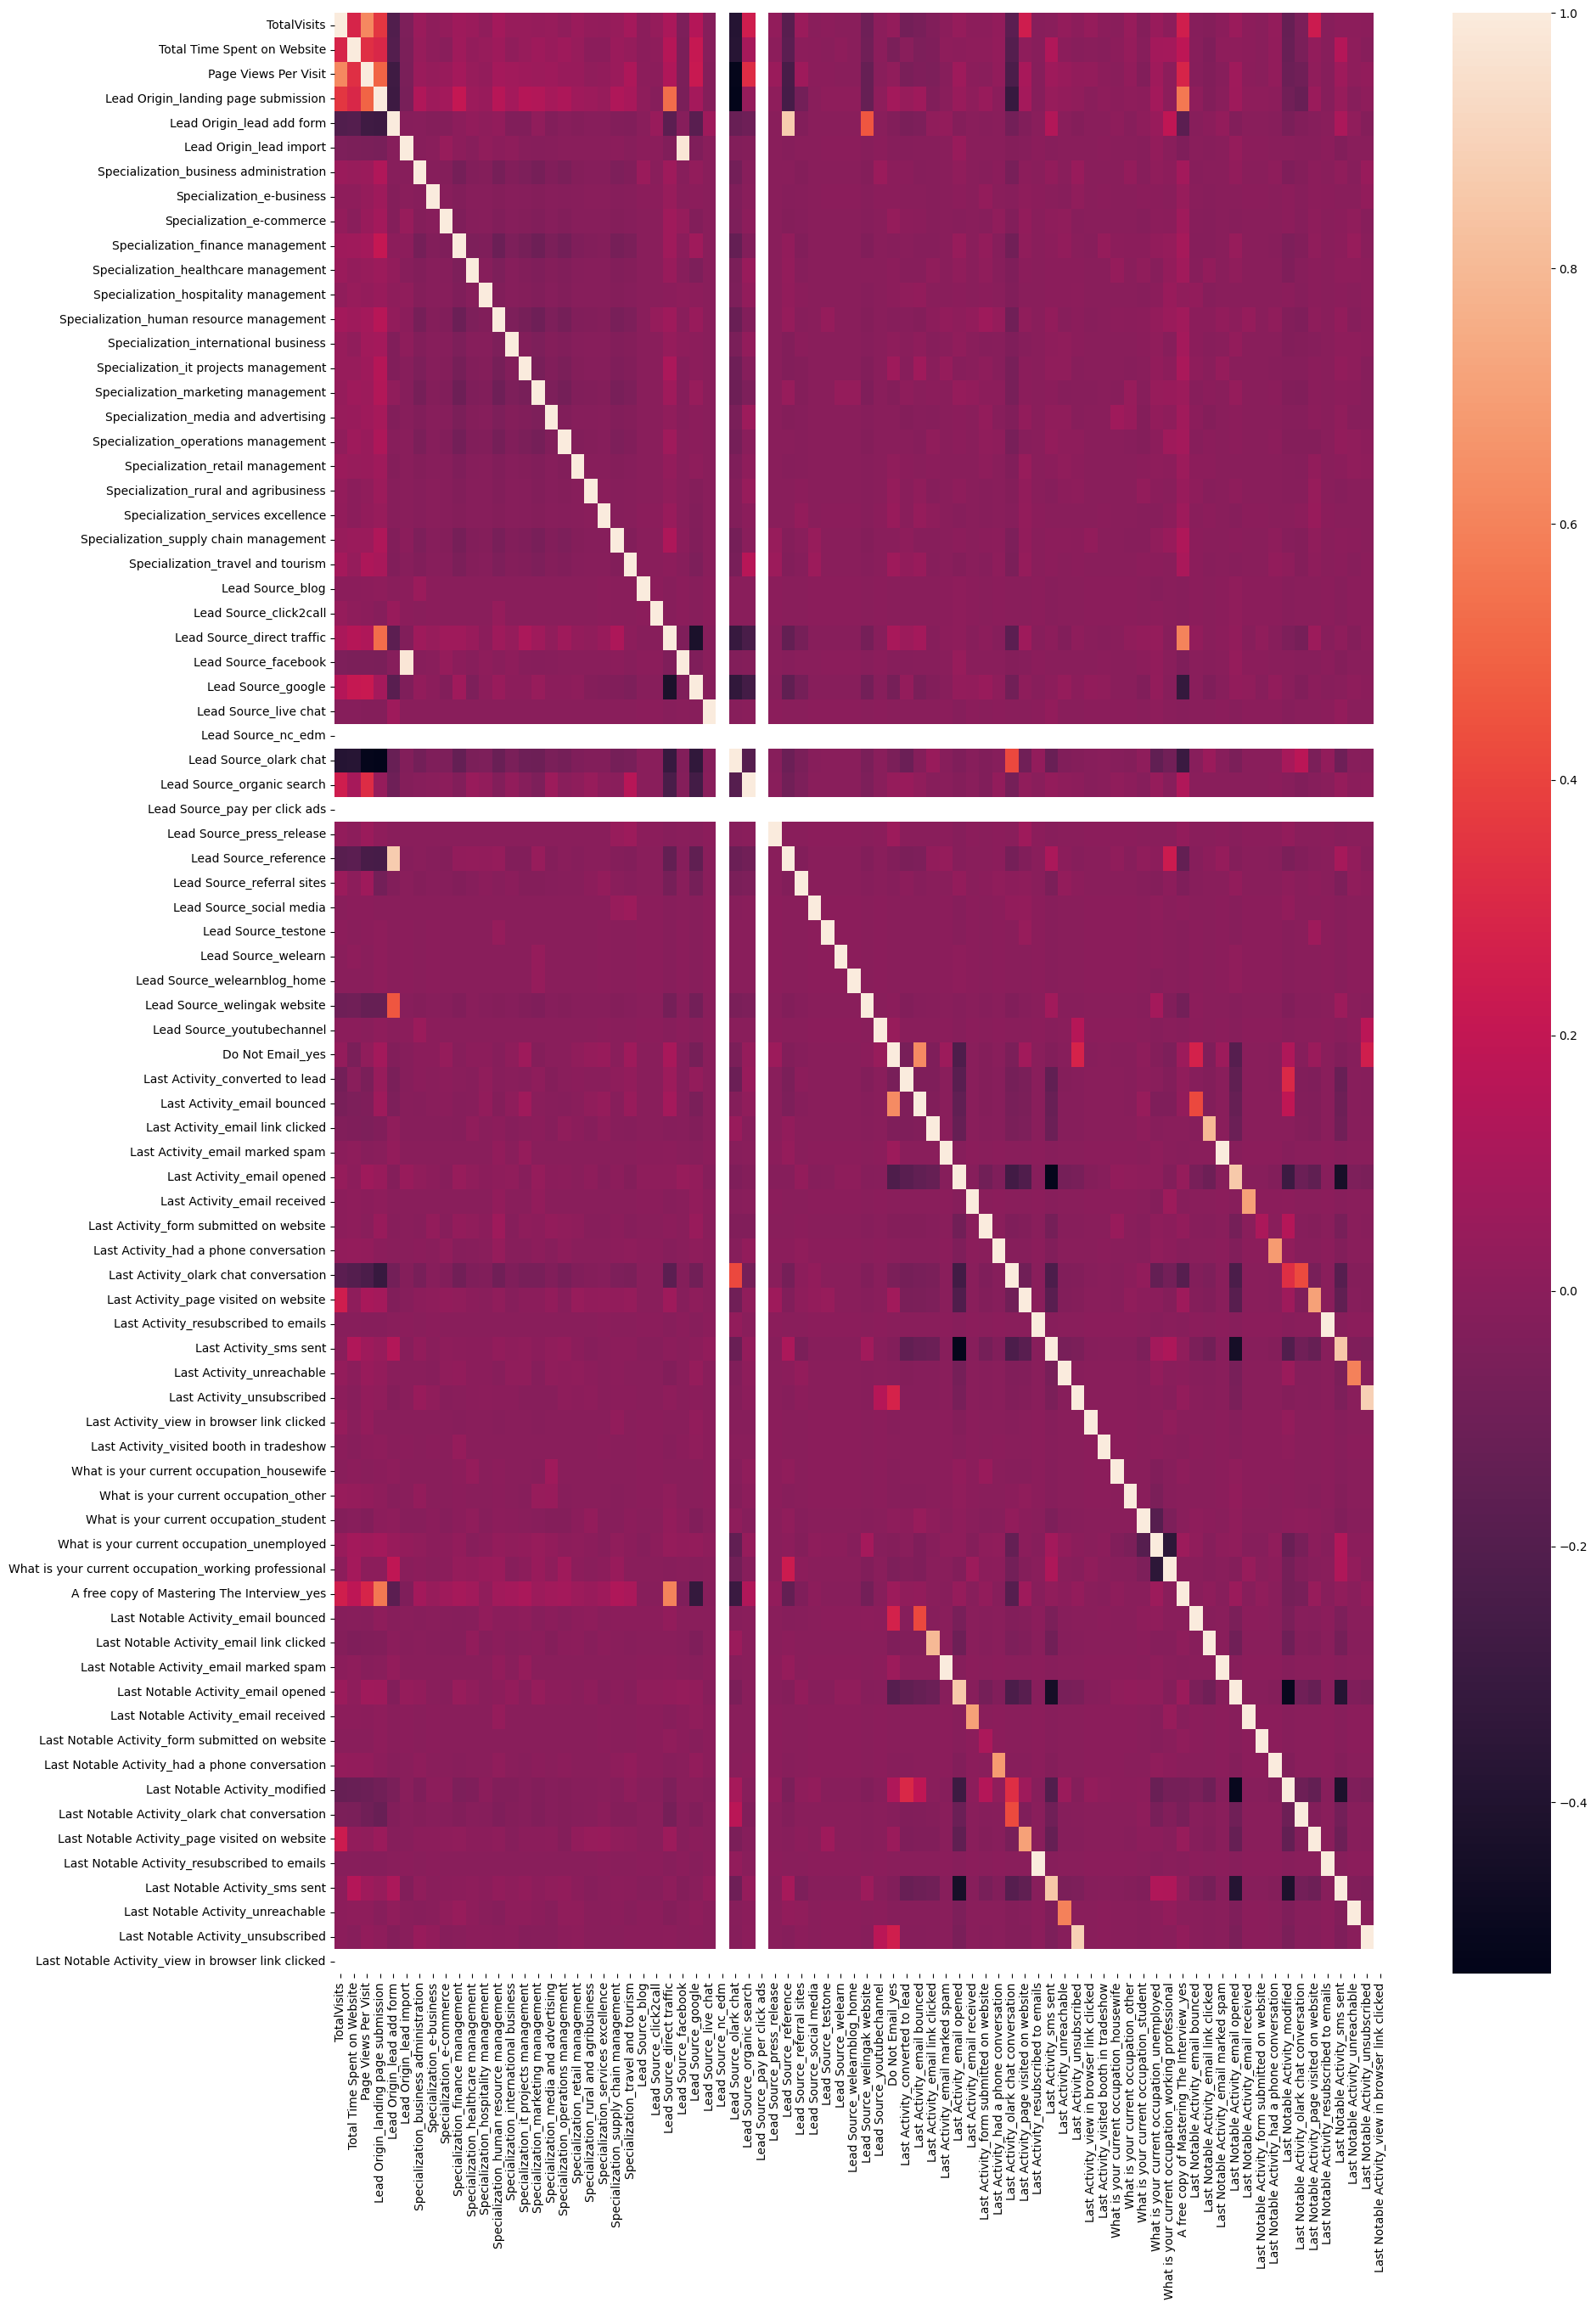

In [52]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

<font color= green>___Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE___</font>

## 5. Model Building 

In [53]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [54]:
# Import RFE
from sklearn.feature_selection import RFE

In [55]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, step= 15)
rfe = rfe.fit(X_train, y_train)

In [56]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 3),
 ('Specialization_business administration', False, 2),
 ('Specialization_e-business', False, 2),
 ('Specialization_e-commerce', True, 1),
 ('Specialization_finance management', False, 2),
 ('Specialization_healthcare management', True, 1),
 ('Specialization_hospitality management', False, 3),
 ('Specialization_human resource management', False, 2),
 ('Specialization_international business', False, 2),
 ('Specialization_it projects management', True, 1),
 ('Specialization_marketing management', True, 1),
 ('Specialization_media and advertising', False, 3),
 ('Specialization_operations management', True, 1),
 ('Specialization_retail management', False, 4),
 ('Specialization_rural and agribusiness', True, 1),
 ('Specialization_services excellence', True, 

In [57]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [58]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [59]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
print(X_train.dtypes)
X_train.head()

TotalVisits                                             float64
Total Time Spent on Website                             float64
Page Views Per Visit                                    float64
Lead Origin_landing page submission                        bool
Lead Origin_lead add form                                  bool
Specialization_e-commerce                                  bool
Specialization_healthcare management                       bool
Specialization_it projects management                      bool
Specialization_marketing management                        bool
Specialization_operations management                       bool
Specialization_rural and agribusiness                      bool
Specialization_services excellence                         bool
Specialization_supply chain management                     bool
Lead Source_direct traffic                                 bool
Lead Source_google                                         bool
Lead Source_olark chat                  

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Specialization_e-commerce,Specialization_healthcare management,Specialization_it projects management,Specialization_marketing management,Specialization_operations management,...,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_unreachable
1289,0.014184,0.612676,0.083333,True,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
3604,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5584,0.042553,0.751761,0.250000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7679,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7563,0.014184,0.787852,0.083333,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


In [61]:
X_train_df = pd.DataFrame(X_train)

# Convert all bool columns to int
bool_columns = X_train_df.select_dtypes(include='bool').columns  # Identify boolean columns
X_train_df[bool_columns] = X_train_df[bool_columns].astype(int)


In [62]:
X_train = X_train_df

In [63]:
# Importing statsmodels
import statsmodels.api as sm

In [64]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2549.7
Date:                Sun, 22 Sep 2024   Deviance:                       5099.5
Time:                        20:41:39   Pearson chi2:                 6.48e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4123
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7947      0.323     -5.556      0.000      -2.428      -1.162
TotalVisits                                              8.7096      1.985      4.389      0.000       4.820      12.599
Total Time Spent on Website                              4.6573      0.172     27.154      0.000       4.321       4.994
Page Views Per Visit                                    -2.2754      0.621     -3.663      0.000      -3.493      -1.058
Lead Origin_landing page submission                     -0.2797      0.107     -2.621      0.009      -0.489      -0.071
Lead Origin_lead add form                                1.0916      1.176      0.929      0.353      -1.213       3.396
Specialization_e-commerce                                0.4752      0.312      1.521      0.128      -0.137       1.087
Specialization_healthcare management                     0.2779      0.266      1.047      0.295      -0.243       0.798
Specialization_it projects management                    0.2529      0.182      1.386      0.166      -0.105       0.610
Specialization_marketing management                      0.4127      0.124      3.341      0.001       0.171       0.655
Specialization_operations management                     0.2856      0.158      1.811      0.070      -0.024       0.595
Specialization_rural and agribusiness                    0.4130      0.412      1.003      0.316      -0.394       1.220
Specialization_services excellence                       0.5474      0.548      0.999      0.318      -0.527       1.621
Specialization_supply chain management                   0.2489      0.184      1.356      0.175      -0.111       0.609
Lead Source_direct traffic                              -0.5047      0.274     -1.843      0.065      -1.041       0.032
Lead Source_google                                      -0.1812      0.264     -0.687      0.492      -0.698       0.336
Lead Source_olark chat                                   0.9085      0.272      3.343      0.001       0.376       1.441
Lead Source_organic search                              -0.2921      0.274     -1.067      0.286      -0.828       0.244
Lead Source_reference                                    1.9797      1.187      1.667      0.095      -0.347       4.307
Lead Source_welingak website                             4.6528      1.545      3.011      0.003       1.624       7.681
Do Not Email_yes                                        -1.2746      0.208     -6.134      0.000      -1.682      -0.867
Last Activity_converted to lead                         -0.6687      0.222     -3.008      0.003      -1.104      -0.233
Last Activity_email bounced                             -0

In [65]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
38,Last Notable Activity_resubscribed to emails,inf
25,Last Activity_resubscribed to emails,inf
4,Lead Origin_lead add form,82.82
17,Lead Source_reference,64.53
18,Lead Source_welingak website,19.13
13,Lead Source_direct traffic,8.67
14,Lead Source_google,8.29
33,Last Notable Activity_email opened,6.44
2,Page Views Per Visit,5.32
26,Last Activity_sms sent,5.22


In [67]:
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [68]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2551.7
Date:                Sun, 22 Sep 2024   Deviance:                       5103.4
Time:                        20:41:40   Pearson chi2:                 6.48e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4120
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7754      0.323     -5.494      0.000      -2.409      -1.142
TotalVisits                                              8.7387      1.981      4.411      0.000       4.855      12.622
Total Time Spent on Website                              4.6507      0.171     27.129      0.000       4.315       4.987
Page Views Per Visit                                    -2.2601      0.620     -3.645      0.000      -3.475      -1.045
Lead Origin_landing page submission                     -0.2757      0.107     -2.585      0.010      -0.485      -0.067
Lead Origin_lead add form                                1.0922      1.176      0.929      0.353      -1.212       3.396
Specialization_e-commerce                                0.4663      0.312      1.495      0.135      -0.145       1.078
Specialization_healthcare management                     0.2775      0.265      1.045      0.296      -0.243       0.798
Specialization_it projects management                    0.2515      0.182      1.379      0.168      -0.106       0.609
Specialization_marketing management                      0.4134      0.123      3.350      0.001       0.172       0.655
Specialization_operations management                     0.2840      0.158      1.799      0.072      -0.025       0.593
Specialization_rural and agribusiness                    0.4143      0.412      1.006      0.315      -0.393       1.222
Specialization_services excellence                       0.5486      0.548      1.001      0.317      -0.526       1.623
Specialization_supply chain management                   0.2491      0.183      1.358      0.175      -0.111       0.609
Lead Source_direct traffic                              -0.5045      0.274     -1.838      0.066      -1.042       0.033
Lead Source_google                                      -0.1756      0.264     -0.664      0.506      -0.693       0.342
Lead Source_olark chat                                   0.9135      0.272      3.355      0.001       0.380       1.447
Lead Source_organic search                              -0.2965      0.274     -1.081      0.280      -0.834       0.241
Lead Source_reference                                    1.9843      1.187      1.671      0.095      -0.343       4.311
Lead Source_welingak website                             4.6611      1.545      3.017      0.003       1.633       7.689
Do Not Email_yes                                        -1.2838      0.208     -6.183      0.000      -1.691      -0.877
Last Activity_converted to lead                         -0.6655      0.222     -2.995      0.003      -1.101      -0.230
Last Activity_email bounced                             -0

In [69]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
37,Last Notable Activity_resubscribed to emails,inf
25,Last Activity_resubscribed to emails,inf
4,Lead Origin_lead add form,82.82
17,Lead Source_reference,64.53
18,Lead Source_welingak website,19.13
13,Lead Source_direct traffic,8.64
14,Lead Source_google,8.26
33,Last Notable Activity_email opened,6.40
2,Page Views Per Visit,5.32
3,Lead Origin_landing page submission,5.21


In [70]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [71]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6313
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2559.6
Date:                Sun, 22 Sep 2024   Deviance:                       5119.2
Time:                        20:41:42   Pearson chi2:                 6.49e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4105
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7397      0.322     -5.395      0.000      -2.372      -1.108
TotalVisits                                              8.6711      1.977      4.386      0.000       4.796      12.546
Total Time Spent on Website                              4.6447      0.171     27.142      0.000       4.309       4.980
Page Views Per Visit                                    -2.3053      0.619     -3.721      0.000      -3.519      -1.091
Lead Origin_landing page submission                     -0.2661      0.106     -2.499      0.012      -0.475      -0.057
Lead Origin_lead add form                                1.0985      1.175      0.935      0.350      -1.205       3.402
Specialization_e-commerce                                0.4606      0.312      1.478      0.139      -0.150       1.071
Specialization_healthcare management                     0.3222      0.264      1.222      0.222      -0.195       0.839
Specialization_it projects management                    0.2459      0.182      1.350      0.177      -0.111       0.603
Specialization_marketing management                      0.4089      0.123      3.317      0.001       0.167       0.651
Specialization_operations management                     0.2782      0.158      1.765      0.078      -0.031       0.587
Specialization_rural and agribusiness                    0.4038      0.411      0.982      0.326      -0.402       1.210
Specialization_services excellence                       0.5438      0.548      0.993      0.321      -0.529       1.617
Specialization_supply chain management                   0.2436      0.183      1.329      0.184      -0.116       0.603
Lead Source_direct traffic                              -0.5044      0.274     -1.840      0.066      -1.042       0.033
Lead Source_google                                      -0.1736      0.264     -0.658      0.511      -0.691       0.344
Lead Source_olark chat                                   0.9058      0.272      3.331      0.001       0.373       1.439
Lead Source_organic search                              -0.2821      0.274     -1.030      0.303      -0.819       0.255
Lead Source_reference                                    1.9952      1.187      1.681      0.093      -0.331       4.322
Lead Source_welingak website                             4.6549      1.545      3.013      0.003       1.627       7.683
Do Not Email_yes                                        -1.2884      0.208     -6.207      0.000      -1.695      -0.882
Last Activity_converted to lead                         -0.6835      0.222     -3.080      0.002      -1.118      -0.249
Last Activity_email bounced                             -0

In [72]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
36,Last Notable Activity_resubscribed to emails,inf
25,Last Activity_resubscribed to emails,inf
4,Lead Origin_lead add form,82.82
17,Lead Source_reference,64.53
18,Lead Source_welingak website,19.13
13,Lead Source_direct traffic,8.64
14,Lead Source_google,8.25
32,Last Notable Activity_email opened,6.40
2,Page Views Per Visit,5.32
3,Lead Origin_landing page submission,5.21


In [73]:
X_train.drop('What is your current occupation_other', axis = 1, inplace = True)

In [74]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2563.9
Date:                Sun, 22 Sep 2024   Deviance:                       5127.8
Time:                        20:41:43   Pearson chi2:                 6.54e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4097
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7367      0.322     -5.391      0.000      -2.368      -1.105
TotalVisits                                              8.9558      1.980      4.523      0.000       5.075      12.837
Total Time Spent on Website                              4.6539      0.171     27.207      0.000       4.319       4.989
Page Views Per Visit                                    -2.3144      0.619     -3.738      0.000      -3.528      -1.101
Lead Origin_landing page submission                     -0.2717      0.106     -2.553      0.011      -0.480      -0.063
Lead Origin_lead add form                                1.1014      1.176      0.936      0.349      -1.204       3.407
Specialization_e-commerce                                0.4554      0.311      1.462      0.144      -0.155       1.066
Specialization_healthcare management                     0.3144      0.264      1.193      0.233      -0.202       0.831
Specialization_it projects management                    0.2418      0.182      1.328      0.184      -0.115       0.599
Specialization_marketing management                      0.4272      0.123      3.471      0.001       0.186       0.668
Specialization_operations management                     0.2744      0.158      1.741      0.082      -0.034       0.583
Specialization_rural and agribusiness                    0.3980      0.411      0.968      0.333      -0.408       1.204
Specialization_services excellence                       0.5374      0.546      0.984      0.325      -0.534       1.608
Specialization_supply chain management                   0.2385      0.183      1.302      0.193      -0.121       0.598
Lead Source_direct traffic                              -0.4891      0.274     -1.786      0.074      -1.026       0.048
Lead Source_google                                      -0.1680      0.264     -0.637      0.524      -0.685       0.349
Lead Source_olark chat                                   0.9110      0.272      3.351      0.001       0.378       1.444
Lead Source_organic search                              -0.2759      0.274     -1.008      0.313      -0.812       0.260
Lead Source_reference                                    2.0065      1.188      1.689      0.091      -0.322       4.335
Lead Source_welingak website                             4.6684      1.546      3.020      0.003       1.639       7.698
Do Not Email_yes                                        -1.2909      0.208     -6.220      0.000      -1.698      -0.884
Last Activity_converted to lead                         -0.6835      0.222     -3.080      0.002      -1.118      -0.249
Last Activity_email bounced                             -0

In [75]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
35,Last Notable Activity_resubscribed to emails,inf
25,Last Activity_resubscribed to emails,inf
4,Lead Origin_lead add form,82.82
17,Lead Source_reference,64.52
18,Lead Source_welingak website,19.13
13,Lead Source_direct traffic,8.64
14,Lead Source_google,8.25
31,Last Notable Activity_email opened,6.40
2,Page Views Per Visit,5.32
3,Lead Origin_landing page submission,5.21


## 6. Creating Prediction

In [76]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.695963
3604    0.093432
5584    0.229664
7679    0.098738
7563    0.259132
7978    0.891225
7780    0.195327
7863    0.985967
838     0.640098
708     0.173305
dtype: float64

In [77]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.69596275, 0.09343165, 0.22966351, 0.09873803, 0.25913222,
       0.89122463, 0.19532732, 0.98596666, 0.64009785, 0.17330463])

In [78]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.695963
1,0,0.093432
2,0,0.229664
3,0,0.098738
4,0,0.259132


In [79]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.695963,1
1,0,0.093432,0
2,0,0.229664,0
3,0,0.098738,0
4,0,0.259132,0


## 7. Model Evaluation

In [80]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [81]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3449,  446],
       [ 712, 1744]], dtype=int64)

In [82]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [83]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8176665092111478

<font color= green>___That's around 81% accuracy with is a very good value___</font>

In [84]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [85]:
# Calculating the sensitivity
TP/(TP+FN)

0.7100977198697068

In [86]:
# Calculating the specificity
TN/(TN+FP)

0.8854942233632863

## 7. Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one

In [87]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [88]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

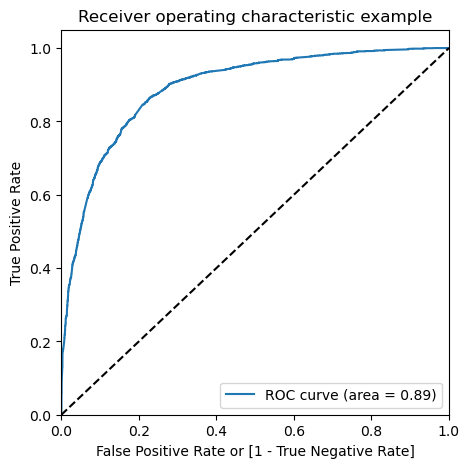

In [89]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

<font color= green>___The area under ROC curve is 0.89 which is a very good value.___</font>

In [90]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.695963,1,1,1,1,1,1,1,1,0,0,0
1,0,0.093432,0,1,0,0,0,0,0,0,0,0,0
2,0,0.229664,0,1,1,1,0,0,0,0,0,0,0
3,0,0.098738,0,1,0,0,0,0,0,0,0,0,0
4,0,0.259132,0,1,1,1,0,0,0,0,0,0,0


In [91]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.635490,0.968648,0.425417
0.2,0.2,0.768068,0.918974,0.672914
0.3,0.3,0.804913,0.870521,0.763543
0.4,0.4,0.817194,0.788681,0.835173
0.5,0.5,0.817667,0.710098,0.885494
0.6,0.6,0.809479,0.636808,0.918357
0.7,0.7,0.783971,0.525651,0.946855
0.8,0.8,0.757676,0.427117,0.966110
0.9,0.9,0.712329,0.278909,0.985623


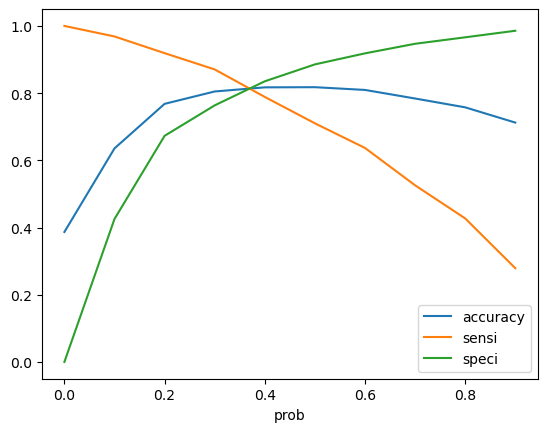

In [92]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [93]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.695963,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.093432,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.229664,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.098738,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.259132,0,1,1,1,0,0,0,0,0,0,0,0


In [94]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8107384663832468

In [95]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3070,  825],
       [ 377, 2079]], dtype=int64)

In [96]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [97]:
# Calculating the sensitivity
TP/(TP+FN)

0.8464983713355049

In [98]:
# Calculating the specificity
TN/(TN+FP)

0.7881899871630296

## 8. Prediction on Test set

In [99]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [100]:
# Substituting all the columns in the final train model
col = X_train.columns

In [101]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Specialization_e-commerce,Specialization_healthcare management,Specialization_it projects management,Specialization_marketing management,...,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_unreachable
8308,1.0,0.035461,0.416813,0.208333,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
7212,1.0,0.028369,0.001320,0.166667,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2085,1.0,0.000000,0.000000,0.000000,False,True,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
4048,1.0,0.028369,0.617077,0.083333,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4790,1.0,0.028369,0.005282,0.083333,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,0.000000,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
8179,1.0,0.170213,0.148768,0.333333,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
6236,1.0,0.000000,0.000000,0.000000,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5240,1.0,0.078014,0.458627,0.229167,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [102]:
df_test = pd.DataFrame(X_test_sm)

# Convert all bool columns to int
bool_columns = df_test.select_dtypes(include='bool').columns  # Identify boolean columns
df_test[bool_columns] = df_test[bool_columns].astype(int)

X_test_sm = df_test

In [103]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.204301
1,1,0.840040
2,1,0.985967
3,1,0.876116
4,0,0.160408


In [104]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.204301,0
1,1,0.840040,1
2,1,0.985967,1
3,1,0.876116,1
4,0,0.160408,0
...,...,...,...
2718,1,0.117061,0
2719,0,0.272847,0
2720,0,0.163123,0
2721,1,0.838477,1


In [105]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8079324274697025

In [106]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1372,  372],
       [ 151,  828]], dtype=int64)

In [107]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [108]:
# Calculating the sensitivity
TP/(TP+FN)

0.8457609805924413

In [109]:
# Calculating the specificity
TN/(TN+FP)

0.786697247706422

## 9. Precision-Recall

In [110]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3449,  446],
       [ 712, 1744]], dtype=int64)

In [111]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7963470319634703

In [112]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7100977198697068

<font color= green>___With the current cut off as 0.35 we have Precision around 78% and Recall around 70%___</font>

### 9.1. Precision and recall tradeoff

In [113]:
from sklearn.metrics import precision_recall_curve

In [114]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [115]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

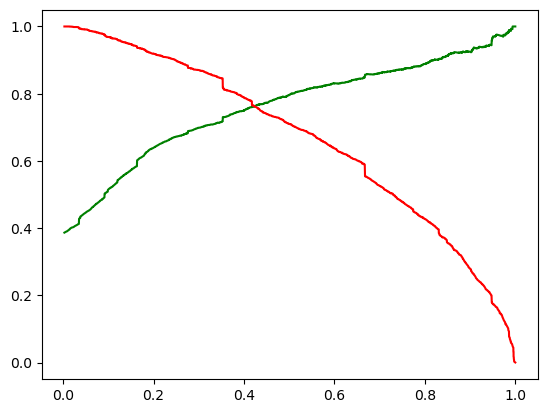

In [116]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [117]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.695963,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.093432,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.229664,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.098738,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.259132,0,1,1,1,0,0,0,0,0,0,0,0


In [118]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8184537868052275

In [119]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3278,  617],
       [ 536, 1920]], dtype=int64)

In [120]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [121]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7567993693338589

In [122]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7817589576547231

## 10. Prediction on Test set

In [123]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.204301
1,1,0.840040
2,1,0.985967
3,1,0.876116
4,0,0.160408


In [124]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.204301,0
1,1,0.840040,1
2,1,0.985967,1
3,1,0.876116,1
4,0,0.160408,0
...,...,...,...
2718,1,0.117061,0
2719,0,0.272847,0
2720,0,0.163123,0
2721,1,0.838477,1


In [125]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8200514138817481

In [126]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1472,  272],
       [ 218,  761]], dtype=int64)

In [127]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [128]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7366892545982575

In [129]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7773237997957099

## Conclusion
It was found that the variables that mattered the most in the potential buyers are (In descending order) :
1.	The total time spend on the Website.
2.	Total number of visits.
3.	When the lead source was: <br>
a.	Google<br>
b.	Direct traffic<br>
c.	Organic search<br>
d.	Welingak website<br>
4.	When the last activity was:<br>
a.	SMS<br>
b.	Olark chat conversation<br>
5.	When the lead origin is Lead add format.
6.	When their current occupation is as a working professional.<br>
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.